# INFO

Requirements:

- Data files: csv files containg the record of the stellar evolution for a set of stars evolved in Parsec (assuming different prescriptions for the estimate of the binding energy) and Mobse. All the files are  present  in the repository
- Python 3.9 or newer
- modules: pandas, numpy, matplotlib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

import matplotlib as mpl
label_size =18
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
#mpl.rcParams['mathtext.default']='regular'
mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams['contour.negative_linestyle'] = 'solid'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 1
import warnings
warnings.filterwarnings('ignore')
import subprocess
import warnings
warnings.filterwarnings('ignore')
import subprocess

import matplotlib.colors as colors


def filt(df,Mass,Z):
    idx = (df.Zams==Mass) & (df.Zmet==Z)
    name=df.ID[idx].values[0]
    dff=df[df.ID==name]
    
    tCHEB=dff[dff.PhaseBSE==4].Worldtime.min()
    pcheb=(dff["Worldtime"]-dff["Worldtime"].min())/(tCHEB-dff["Worldtime"].min())
    paft=(dff["Worldtime"]-tCHEB)/(dff["Worldtime"].max()-tCHEB)
    
    dff["plife"]=np.where(dff.Worldtime<=tCHEB,pcheb,1+paft)
    
    return dff

def filt_bse(df,Mass,Z):
    idx = (df.Zams==Mass) & (df.Zmet==Z)
    dff=df[idx]
    tCHEB=dff[dff.PhaseBSE==4].Worldtime.min()
    pcheb=(dff["Worldtime"]-dff["Worldtime"].min())/(tCHEB-dff["Worldtime"].min())
    paft=(dff["Worldtime"]-tCHEB)/(dff["Worldtime"].max()-tCHEB)
    
    dff["plife"]=np.where(dff.Worldtime<=tCHEB,pcheb,1+paft)
    return dff

cols_mobse=("ID","name","Worldtime","Localtime",
      "Lambda","Radius","Mass","MHE","RHE",
      "Qconv","Depthconv","Phase","PhaseBSE","Zams","Zmet")


#alpha_c={5:"sandybrown", 3:"palevioletred", 1:"blueviolet", 0.5:"darkblue"}

def get_df(df):
    df=df.drop_duplicates()
    df=df[ (df.PhaseBSE>1) & (df.PhaseBSE<7)] 
    G = 3.925125598496094e8
    Msun_cgs = 1.988409870698051e+33
    Rsun_cgs = 6.95700e10
    yr_cgs = 3.1557600e7
    K = Msun_cgs*Rsun_cgs*Rsun_cgs/(yr_cgs*yr_cgs)
    
    df["Ebind"]=df["Ebind"]* G * K
    return df



In [5]:
cmap = mpl.cm.get_cmap('plasma')



#dfmobse=pd.read_csv("mobse_output_lion1_bkp.csv",header=0,names=cols_mobse,sep="\s+")
dfmobse=pd.read_csv("mobse_output_lion1.csv",sep="\s+")


dfmobse["Ebind"]=dfmobse.Mass*(dfmobse.Mass-dfmobse.MHE)/(dfmobse.Radius*dfmobse.Lambda)
dfmobse=get_df(dfmobse)
dfmobse_dic={
    "df": dfmobse,
    "c": cmap(0.9),
    "ls": "solid",
    "lw": 3,
    "label":"MOBSE Claeys+14"
}

dfpbse=pd.read_csv("parsec_ov05_lbse.csv")
dfpbse=get_df(dfpbse)
dfpbse_dic={
    "df": dfpbse,
    "c": cmap(0),
    "ls": "solid",
    "lw":5,
    "label":"$\lambda$ Claeys+14"
}

dfpl=pd.read_csv("parsec_ov05_l01.csv")
dfpl=get_df(dfpl)
dfpl_dic={
    "df": dfpl,
    "c": cmap(0.3),
    "ls": "dashed",
    "lw":4,
    "label":"$\lambda=0.1$"
}

dfpk=pd.read_csv("parsec_ov05_lk.csv")
dfpk=get_df(dfpk)
dfpk_dic={
    "df": dfpk,
    "c":cmap(0.6),
    "ls": "dotted",
    "lw":4,
    "label":"$\lambda$ Klencki+21"
}

dfpx=pd.read_csv("parsec_ov05_lx.csv")
dfpx=get_df(dfpx)
dfpx_dic={
    "df": dfpx,
    "c":  cmap(0.75),
    "ls": "dashdot",
    "lw":4,
    "label":"$\lambda$ Xu&Li10"
}

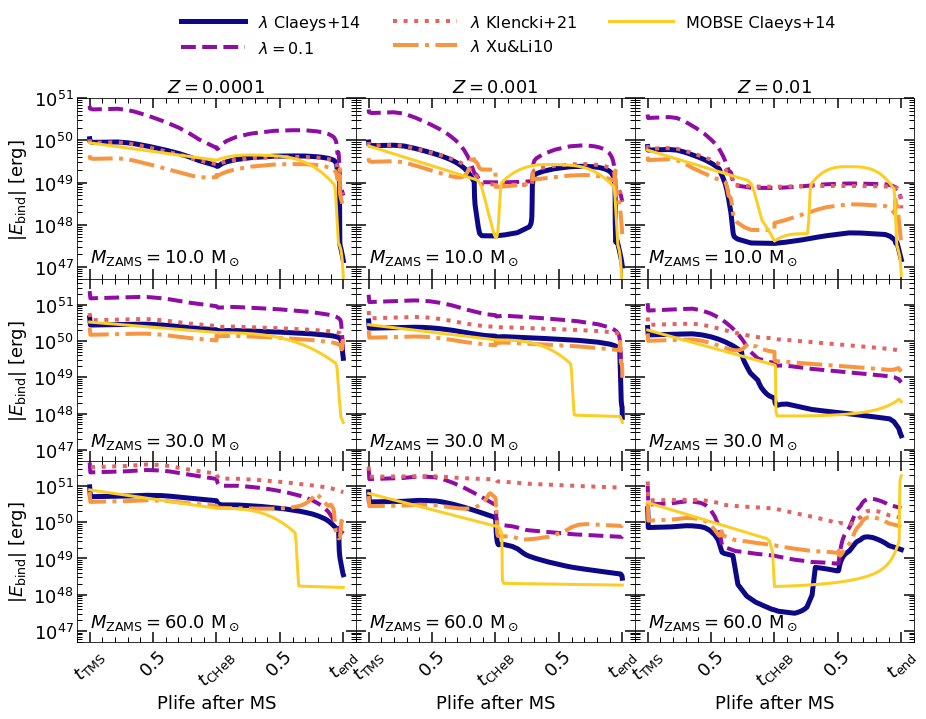

In [6]:

fig = plt.figure(figsize=(15, 10), constrained_layout=False)
gs = fig.add_gridspec(3, 3, wspace=0, hspace=0)
#axl=[fig.add_subplot(gs[1]),fig.add_subplot(gs[0])]

Zl=(0.0001,0.001,0.01)
Ml=(10.0,30.0,60.0)




axl=[]
for i,M in enumerate(Ml):
    for j, Z in enumerate(Zl):
        ax=fig.add_subplot(gs[i,j])
        axl.append(ax)
        
        for k,dfd in enumerate((dfpbse_dic,dfpl_dic,dfpk_dic,dfpx_dic,dfmobse_dic)):
            if k!=4: dft = filt(dfd["df"],M,Z)
            else: dft = filt_bse(dfd["df"],M,Z)

            plt.plot(dft.plife,np.abs(dft.Ebind),c=dfd["c"],
                    ls=dfd["ls"],lw=dfd["lw"],label=dfd["label"])

        ax.text(0,1.3e47,f"$M_\mathrm{{ZAMS}}={M} \ \mathrm{{M}}_\odot$",fontsize=label_size)
        
        if j==0:
            ax.tick_params(axis='y', which='both',right='on',direction="in",top="on",left="on",
                               labelright=False,labelbottom=False)
            ax.set_ylabel("|$E_\mathrm{bind}$| [erg]",fontsize=label_size)
        else:
            ax.tick_params(axis='y', which='both',right='on',direction="in",top="on",left="on",
                               labelright=False,labelleft=False)
    
        if i==2:
            ax.tick_params(axis='x', which='both',right='on',direction="in",top="on",
                               labeltop=False,labelbottom=True)
            ax.set_xlabel("Plife after MS",fontsize=label_size)
        else:
            ax.tick_params(axis='x', which='both',right='on',direction="in",top="on",
                labeltop=False,labelbottom=False)
        
        
        if i==0:
            ax.set_title(f"$Z={Z}$",fontsize=label_size)


for ax in axl[:3]:
    ax.set_ylim(5e46,1e51)
    
for ax in axl[3:6]:
    ax.set_ylim(5e46,5e51)
    
for ax in axl[6:]:
    ax.set_ylim(5e46,5e51)

    
for ax in axl:
    ax.set_yscale("log")
    ax.set_xticks([0.,0.5,1.0,1.5,2.0])
    
    locmax = mpl.ticker.LogLocator(base=10.0,numticks=12)
    locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
    ax.yaxis.set_minor_locator(locmin)
    ax.yaxis.set_major_locator(locmax)
    ax.set_xticklabels(["$t_\mathrm{TMS}$","0.5","$t_\mathrm{CHeB}$","0.5","$t_\mathrm{end}$"],rotation=45)
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
axl[0].legend(ncol=3,fontsize=label_size-2,loc=(0.35,1.2),handlelength=4,frameon=False)
#plt.yscale("log")

fig.savefig("Ebind.pdf")